# Metrics glossary for multiclass and multilabel classification

## Types of classification

![metrics_fig1.png](figures/metrics_fig0.png)

In [1]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

Examples for the multilabel scenario:

In [2]:
multilabel_actual= [
    [1,0,0,0],
    [0,1,0,0],
    [1,1,0,0],
    [1,0,0,0]
]

multilabel_pred = [
    [1,0,0,0], # 100% right
    [1,1,0,0], # one code extra
    [0,1,0,0], # one code missed
    [0,1,0,0]  # one code missed, one code extra
]

Examples for the multiclass scenario:

In [3]:
multiclass_actual= [
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0],
]

multiclass_pred = [
    [1,0,0,0], # 100% right
    [1,0,0,0], #   0% right
    [0,1,0,0], # 100% right
]

## Intro

![metrics_fig1.png](figures/metrics_fig1.png)

## Accuracy
![metrics_fig2.png](figures/metrics_fig2.png)

### Multilabel classification: *How many notes did the model get completely right?*

    [1,0,0,0], # 100% right                      -> accuracy = 100%
    [1,1,0,0], # one code extra                  -> accuracy =   0%
    [0,1,0,0], # one code missed                 -> accuracy =   0%
    [0,1,0,0]  # one code missed, one code extra -> accuracy =   0% 

In [4]:
accuracy_score(y_true=multilabel_actual, y_pred=multilabel_pred)

0.25

### Multiclass classification: *How many notes did the model get right?*

    [1,0,0,0], # 100% right -> accuracy = 100%
    [1,0,0,0], #   0% right -> accuracy =   0%
    [0,1,0,0], # 100% right -> accuracy = 100%

In [5]:
accuracy_score(y_true=multiclass_actual, y_pred=multiclass_pred)

0.6666666666666666

## Precision

![metrics_fig3.png](figures/metrics_fig3.png)

### Multilabel classification: *What's the average of the individual notes' precision (the number of predicted codes that are part of the actual note's codes)?*

`average = "samples"` calculates metrics for each instance, and find their average

    [1,0,0,0], # 100% right                      -> precision = 100%
    [1,1,0,0], # one code extra                  -> precision =  50%
    [0,1,0,0], # one code missed                 -> precision = 100%
    [0,1,0,0]  # one code missed, one code extra -> precision =   0% 

In [6]:
(1.0 + 0.5 + 1.0 + 0) / 4

0.625

In [7]:
precision_score(y_true=multilabel_actual, y_pred=multilabel_pred, average="samples")

0.625

### Multiclass classification: *How many predicted codes are part of the actual notes’ codes?*

`average = "samples` : calculates metrics for each instance, and find their average; **for multiclass classification this measures the exact same as accuracy**

    [1,0,0,0], # 100% right -> precision = 100%
    [1,0,0,0], #   0% right -> precision =   0%
    [0,1,0,0], # 100% right -> precision = 100%

In [8]:
(1.0 + 0 + 1.0) / 3

0.6666666666666666

In [9]:
precision_score(y_true=multiclass_actual, y_pred=multiclass_pred, average="samples", zero_division=np.nan)

0.6666666666666666

`average = None` returns an array with the score for each class

In [10]:
precision_score(y_true=multiclass_actual, y_pred=multiclass_pred, average=None, zero_division=np.nan)

array([0.5, 1. , nan, nan])

`average = "micro"` calculates metrics globally by counting the total true positives, false negatives and false positives, *[notice it creates the exact same number as accuracy](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/)* 

In [11]:
precision_score(y_true=multiclass_actual, y_pred=multiclass_pred, average="micro", zero_division=np.nan) 

0.6666666666666666

`average = "macro"` calculates metrics for each label, and find their unweighted mean (this does not take label imbalance into account)

In [12]:
precision_score(y_true=multiclass_actual, y_pred=multiclass_pred, average="macro", zero_division=np.nan)

0.75

## Recall
![metrics_fig4.png](figures/metrics_fig4.png)

### Multilabel classification: *What's the average of the individual notes' recall (the number of codes meant to be predicted that are returned by the model)?*

`average = "samples"` calculates metrics for each instance, and find their average

    [1,0,0,0], # 100% right                      -> recall = 100%
    [1,1,0,0], # one code extra                  -> recall = 100%
    [0,1,0,0], # one code missed                 -> rcall  =  50%
    [0,1,0,0]  # one code missed, one code extra -> recall =   0% 

In [13]:
(1.0 + 1.0 + 0.5 + 0) / 4

0.625

In [14]:
recall_score(y_true=multilabel_actual, y_pred=multilabel_pred, average="samples")

0.625

### Multiclass classification: *How many codes meant to be predicted (the ground truth codes) are returned by the model?*

`average = "samples` : calculates metrics for each instance, and find their average; **for multiclass classification, just like precision, this measures the exact same as accuracy**

    [1,0,0,0], # 100% right -> recall = 100%
    [1,0,0,0], #   0% right -> recall =   0%
    [0,1,0,0], # 100% right -> recall = 100%

In [15]:
(1.0 + 0 + 1.0) / 3

0.6666666666666666

In [16]:
recall_score(y_true=multiclass_actual, y_pred=multiclass_pred, average="samples", zero_division=np.nan)

0.6666666666666666

`average = None` returns an array with the score for each class

In [17]:
recall_score(y_true=multiclass_actual, y_pred=multiclass_pred, average=None, zero_division=np.nan)

array([1. , 0.5, nan, nan])

`average = "micro"` calculates metrics globally by counting the total true positives, false negatives and false positives, *[notice it creates the exact same number as accuracy](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/)* 

In [18]:
recall_score(y_true=multiclass_actual, y_pred=multiclass_pred, average="micro", zero_division=np.nan)

0.6666666666666666

`average = "macro"` calculates metrics for each label, and find their unweighted mean (this does not take label imbalance into account)

In [19]:
recall_score(y_true=multiclass_actual, y_pred=multiclass_pred, average="macro", zero_division=np.nan)

0.75

## Receiver Operating Characteristic Curve Area Under the Curve (ROC AUC)

![metrics_fig5.png](figures/metrics_fig5.png)

### Multilabel classification: *What's the average of the individual notes' ROC AUC?*

`multi_class="ovr"` stands for One-vs-rest, computes the AUC of each class against the rest; this treats the multiclass case in the same way as the multilabel case

`average = "samples"` calculates metrics for each instance, and find their average

    [1,0,0,0], # 100% right                      -> ROC AUC =  100%
    [1,1,0,0], # one code extra                  -> ROC AUC = 83.3%
    [0,1,0,0], # one code missed                 -> ROC AUC = 33.3%
    [0,1,0,0]  # one code missed, one code extra -> ROC AUC =    0% 

In [20]:
roc_auc_score(y_true=multilabel_actual, y_score=multilabel_pred, average="samples", multi_class="ovr")

0.7291666666666667

### Multiclass classification: *What's the area under the ROC?*

    [1,0,0,0], # 100% right -> ROC AUC = 100%
    [1,0,0,0], #   0% right -> ROC AUC =   0%
    [0,1,0,0], # 100% right -> ROC AUC = 100%

`multi_class="ovr"` stands for One-vs-rest, computes the AUC of each class against the rest; this treats the multiclass case in the same way as the multilabel case

`average=None` returns an array with the score for each class

In [32]:
try:
    roc_auc_score(y_true=multiclass_actual, y_score=multiclass_pred, average=None, multi_class="ovr")
except:
    print("ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.")

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.


`average="micro"` calculates metrics globally by considering each element of the label indicator matrix as a label

In [21]:
roc_auc_score(y_true=multiclass_actual, y_score=multiclass_pred, average="micro", multi_class="ovr")

0.7777777777777777

`average="macro"` calculates metrics for each label, and find their unweighted mean (this does not take label imbalance into account)

In [30]:
try:
    roc_auc_score(y_true=multiclass_actual, y_score=multiclass_pred, average="macro", multi_class="ovr")
except:
    print("ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.")

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.


## Confusion matrix

### Multilabel and Multiclass classification: *What classes is the model confusing the most?*

Multilabel classification:

To create a confusion matrix (a classes x classes type of confusion matrix) for the multilabel case, we need to transform it into a multiclass scenario by 
1. reverting one-hot encoding, so that [0,0,0,1] becomes 3,
2. and flattening out the list of labels, so that we get a simple list as if there was only one label per data point

In [22]:
labels = [str(i) for i in range(len(multilabel_actual[0]))]

label_multilabel_actual = [
    [str(col_i) for col_i in range(len(labels)) if label[col_i]]
    for label_i, label in enumerate(multilabel_actual)
]  # reverse one-hot encoding

label_multilabel_pred = [
    [str(col_i) for col_i in range(len(labels)) if label[col_i]]
    for label_i, label in enumerate(multilabel_pred)
]  # reverse one-hot encoding

flat_label_multilabel_actual = [
    item for sublist in label_multilabel_actual for item in sublist
]  # turn list of lists into a flat list so that the confusion matrix method can accept it
flat_label_multilabel_pred = [
    item for sublist in label_multilabel_pred for item in sorted(sublist)
]  # aka degroup labels and predictions (they were grouped per note, but since a note can have multiple classes, we need to create multiple instances for those so that we can generate a confusion matrix)

flat_label_multilabel_actual, flat_label_multilabel_pred

(['0', '1', '0', '1', '0'], ['0', '0', '1', '1', '1'])

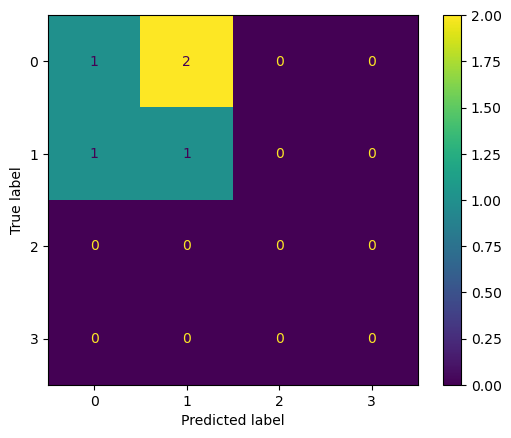

In [23]:
conf_matrix = confusion_matrix(y_true=flat_label_multilabel_actual, y_pred=flat_label_multilabel_pred, labels=labels)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
vis.plot()
plt.show()

Multiclass classification:

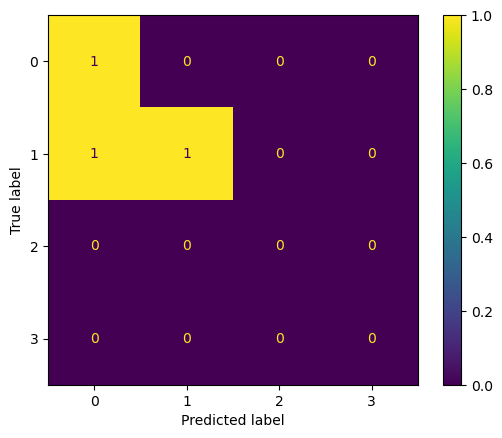

In [24]:
conf_matrix = confusion_matrix(y_true=[str(n) for n in np.argmax(multiclass_actual, axis=1)], y_pred=[str(n) for n in np.argmax(multiclass_pred, axis=1)], labels=[str(i) for i in range(len(multiclass_actual[0]))])
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
vis.plot()
plt.show()